In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [3]:
cast = pd.DataFrame.from_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [20]:
s = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
s = s.groupby(['year','character']).size()
s = s.unstack('character').fillna(0)
s.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [21]:
sup = s[s.Superman - s.Batman > 0]
len(sup)

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [22]:
bat = s[s.Batman - s.Superman > 0]
len(bat)

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

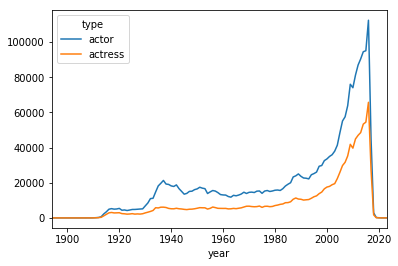

In [28]:
a = cast.groupby(['year','type']).size()
a = a.unstack('type').fillna(0)
a.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

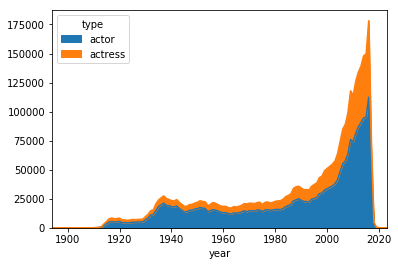

In [29]:
a = cast.groupby(['year','type']).size()
a = a.unstack('type').fillna(0)
a.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

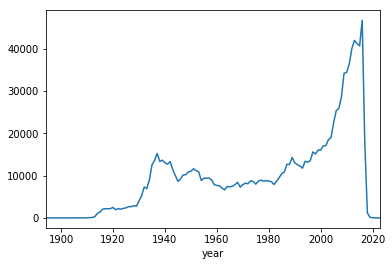

In [56]:
a = cast.groupby(['year','type']).size()
a = a.unstack('type').fillna(0)
(a.actor - a.actress).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

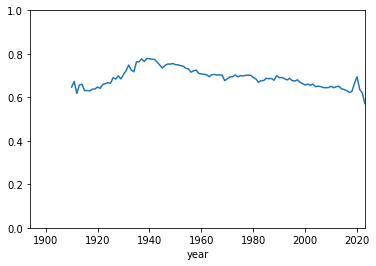

In [58]:
a = cast.groupby(['year','type']).size()
a = a.unstack('type')
(a.actor/(a.actor+a.actress)).plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

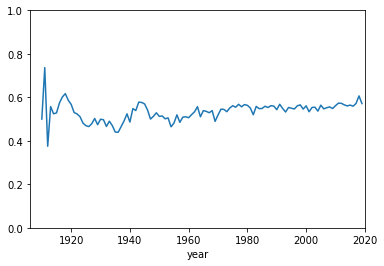

In [60]:
a = cast[cast.n == 2].groupby(['year','type']).size()
a = a.unstack('type')
(a.actor/(a.actor+a.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

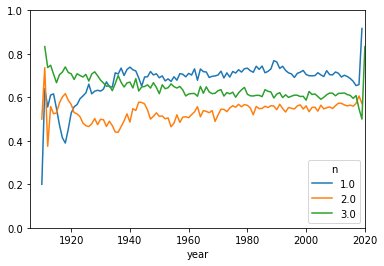

In [62]:
a = cast[cast.n < 4].groupby(['year','type','n']).size()
a = a.unstack('type')
a = (a.actor/(a.actor + a.actress))
a = a.unstack('n')
a.plot(ylim=[0,1])